In [32]:
import spoontacular as sp
import pandas as pd
import pandas as pd
import spoontacular as sp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
# Read in api key from file
with open('api_key.txt', 'r') as f:
    api_key = f.read()

In [2]:
flavors = ['sweetness','saltiness','sourness','bitterness','savoriness','fattiness','spiciness']
sweet_and_sour = sp.get_recipe('sweet and sour', api_key, number=100)
sweet_and_sour['taste_profile'] = sweet_and_sour['id'].apply(lambda row: sp.get_taste(row, api_key))
sweet_and_sourwithflavor = sweet_and_sour.copy()
for falvor in flavors:
    sweet_and_sourwithflavor[falvor] = sweet_and_sour['taste_profile'].apply(lambda row: row[falvor])

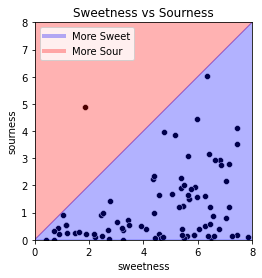

In [39]:
# Create a scatterplot of sweet vs sour 
sns.scatterplot(x='sweetness', y='sourness', data=sweet_and_sourwithflavor, color='black')
# Fill everything above y=x with a color
# And everything below  y=x with a different color
x = np.linspace(0, 10, 100)
y1 = x
# y2 is an array the same length as x but with all values equal to 100
y2 = np.full(len(x), 100)
plt.fill_between(x, y1, y2, color='red', alpha=0.3)
plt.fill_between(x,y1, color='blue', alpha=0.3)
# Add a legend to the plot
# Blue = "Sweet"
# Red = "Sour"
# both are boxes with colors
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='More Sweet',alpha=0.3),
                     Line2D([0], [0], color='red', lw=4, label='More Sour', alpha=0.3)]
plt.legend(
    handles=legend_elements,
    loc='upper left')  
# Make it a square plot
plt.axis('square')
plt.ylim(0, 8)
plt.xlim(0,8)
plt.title('Sweetness vs Sourness')
plt.show()

In [71]:
# Create a scatterplot of sweet vs sour
# With plotly 
# With extra data as hovertext
import plotly.graph_objects as go
import plotly.express as px
# Red points are where sweetness is greater than sourness
# Blue points are where sourness is greater than sweetness
# Green points are where sweetness is equal to sourness
# ADd column for when sweetness is greater than sourness or sourness is greater than sweetness
sweet_and_sourwithflavor['sweet_greater_than_sour'] = sweet_and_sourwithflavor['sweetness'] > sweet_and_sourwithflavor['sourness']
# Change column to text - "Sweet" if true, "Sour" if false
sweet_and_sourwithflavor['sweet_greater_than_sour'] = sweet_and_sourwithflavor['sweet_greater_than_sour'].apply(lambda row: 'More Sweet' if row else 'More Sour')
# Scatterplot 
fig = px.scatter(sweet_and_sourwithflavor, x='sweetness', y='sourness', color='sweet_greater_than_sour', hover_name='title')
fig.update_layout(title='Sweetness vs Sourness')
# Add x-axis title
fig.update_xaxes(title_text='Sweetness')
# Add y-axis title
fig.update_yaxes(title_text='Sourness')
# Change y-axis range to 0-15
fig.update_yaxes(range=[0,15])
# Change x-axis range to 0-15
fig.update_xaxes(range=[0,15])
# Update legend title
fig.update_layout(legend_title_text='Dominant Flavor')

fig.show()
